In [65]:
import pandas as pd
df = pd.read_json('dataset.json')
df.drop(columns=['Turn'],inplace=True)
df.head()

,State,Action
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0
1,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",4
2,"[1, 0, 0, 0, -1, 0, 0, 0, 0]",1
3,"[1, 1, 0, 0, -1, 0, 0, 0, 0]",2
4,"[1, 1, -1, 0, -1, 0, 0, 0, 0]",6


In [66]:
df.shape

(4265, 2)

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['State'], df['Action'], test_size = 0.2)

x_train = np.asarray(list(map(lambda x: np.asarray(x).astype(np.float32), x_train)))
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

x_test = np.asarray(list(map(lambda x: np.asarray(x).astype(np.float32), x_test)))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [68]:
OUT_DIM = len(df['Action'].unique())+1
INPUT_SHAPE = x_train[0].shape

In [69]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = INPUT_SHAPE),
    tf.keras.layers.Bidirectional(LSTM(27)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(OUT_DIM, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (None, 54)                7992      
_________________________________________________________________
dropout_8 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                550       
Total params: 8,542
Trainable params: 8,542
Non-trainable params: 0
_________________________________________________________________


In [71]:
filepath = "weights.best.hdf5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(x_train, y_train, 
                    epochs=300, 
                    validation_data=(x_test, y_test), 
                    verbose=1,
                    callbacks=[es_callback, cp_callback])
model.load_weights(filepath)

Epoch 1/300
102/107 [===========================>..] - ETA: 0s - loss: 2.2821 - accuracy: 0.1281
Epoch 00001: val_accuracy improved from -inf to 0.13716, saving model to weights.best.hdf5
107/107 [==============================] - 1s 13ms/step - loss: 2.2814 - accuracy: 0.1292 - val_loss: 2.2494 - val_accuracy: 0.1372
Epoch 2/300
106/107 [============================>.] - ETA: 0s - loss: 2.2314 - accuracy: 0.1442
Epoch 00002: val_accuracy improved from 0.13716 to 0.17585, saving model to weights.best.hdf5
107/107 [==============================] - 1s 6ms/step - loss: 2.2311 - accuracy: 0.1445 - val_loss: 2.1988 - val_accuracy: 0.1758
Epoch 3/300
103/107 [===========================>..] - ETA: 0s - loss: 2.1860 - accuracy: 0.1751
Epoch 00003: val_accuracy improved from 0.17585 to 0.24619, saving model to weights.best.hdf5
107/107 [==============================] - 0s 5ms/step - loss: 2.1842 - accuracy: 0.1785 - val_loss: 2.1505 - val_accuracy: 0.2462
Epoch 4/300
104/107 [===============

Epoch 27/300
106/107 [============================>.] - ETA: 0s - loss: 1.2704 - accuracy: 0.5755
Epoch 00027: val_accuracy improved from 0.64009 to 0.64713, saving model to weights.best.hdf5
107/107 [==============================] - 1s 10ms/step - loss: 1.2705 - accuracy: 0.5753 - val_loss: 1.1909 - val_accuracy: 0.6471
Epoch 28/300
 98/107 [==========================>...] - ETA: 0s - loss: 1.2608 - accuracy: 0.5749
Epoch 00028: val_accuracy did not improve from 0.64713
107/107 [==============================] - 1s 7ms/step - loss: 1.2579 - accuracy: 0.5780 - val_loss: 1.1725 - val_accuracy: 0.6401
Epoch 29/300
105/107 [============================>.] - ETA: 0s - loss: 1.2403 - accuracy: 0.5774
Epoch 00029: val_accuracy improved from 0.64713 to 0.65651, saving model to weights.best.hdf5
107/107 [==============================] - 1s 8ms/step - loss: 1.2419 - accuracy: 0.5762 - val_loss: 1.1566 - val_accuracy: 0.6565
Epoch 30/300
 97/107 [==========================>...] - ETA: 0s - los

 98/107 [==========================>...] - ETA: 0s - loss: 1.0625 - accuracy: 0.6276
Epoch 00054: val_accuracy did not improve from 0.69402
107/107 [==============================] - 1s 6ms/step - loss: 1.0673 - accuracy: 0.6234 - val_loss: 0.9536 - val_accuracy: 0.6870
Epoch 55/300
101/107 [===========================>..] - ETA: 0s - loss: 1.0570 - accuracy: 0.6383
Epoch 00055: val_accuracy did not improve from 0.69402
107/107 [==============================] - 1s 8ms/step - loss: 1.0557 - accuracy: 0.6386 - val_loss: 0.9495 - val_accuracy: 0.6870
Epoch 56/300
100/107 [===========================>..] - ETA: 0s - loss: 1.0729 - accuracy: 0.6203
Epoch 00056: val_accuracy did not improve from 0.69402
107/107 [==============================] - 1s 5ms/step - loss: 1.0649 - accuracy: 0.6246 - val_loss: 0.9478 - val_accuracy: 0.6835
Epoch 57/300
 97/107 [==========================>...] - ETA: 0s - loss: 1.0386 - accuracy: 0.6369
Epoch 00057: val_accuracy did not improve from 0.69402
107/107 

Epoch 83/300
106/107 [============================>.] - ETA: 0s - loss: 0.9726 - accuracy: 0.6648
Epoch 00083: val_accuracy did not improve from 0.69402
107/107 [==============================] - 1s 7ms/step - loss: 0.9695 - accuracy: 0.6662 - val_loss: 0.8803 - val_accuracy: 0.6893
Epoch 84/300
101/107 [===========================>..] - ETA: 0s - loss: 0.9912 - accuracy: 0.6556
Epoch 00084: val_accuracy did not improve from 0.69402
107/107 [==============================] - 1s 5ms/step - loss: 0.9847 - accuracy: 0.6583 - val_loss: 0.8794 - val_accuracy: 0.6928
Epoch 85/300
103/107 [===========================>..] - ETA: 0s - loss: 0.9624 - accuracy: 0.6611
Epoch 00085: val_accuracy did not improve from 0.69402
107/107 [==============================] - 1s 5ms/step - loss: 0.9667 - accuracy: 0.6606 - val_loss: 0.8761 - val_accuracy: 0.6882
Epoch 86/300
102/107 [===========================>..] - ETA: 0s - loss: 0.9669 - accuracy: 0.6538
Epoch 00086: val_accuracy did not improve from 0.6

Epoch 112/300
102/107 [===========================>..] - ETA: 0s - loss: 0.9263 - accuracy: 0.6722
Epoch 00112: val_accuracy did not improve from 0.70106
107/107 [==============================] - 1s 5ms/step - loss: 0.9224 - accuracy: 0.6735 - val_loss: 0.8529 - val_accuracy: 0.6940
Epoch 113/300
102/107 [===========================>..] - ETA: 0s - loss: 0.9442 - accuracy: 0.6566
Epoch 00113: val_accuracy did not improve from 0.70106
107/107 [==============================] - 1s 5ms/step - loss: 0.9397 - accuracy: 0.6586 - val_loss: 0.8504 - val_accuracy: 0.6975
Epoch 114/300
105/107 [============================>.] - ETA: 0s - loss: 0.9367 - accuracy: 0.6696
Epoch 00114: val_accuracy did not improve from 0.70106
107/107 [==============================] - 0s 4ms/step - loss: 0.9357 - accuracy: 0.6697 - val_loss: 0.8495 - val_accuracy: 0.6917
Epoch 115/300
107/107 [==============================] - ETA: 0s - loss: 0.9313 - accuracy: 0.6688
Epoch 00115: val_accuracy did not improve from

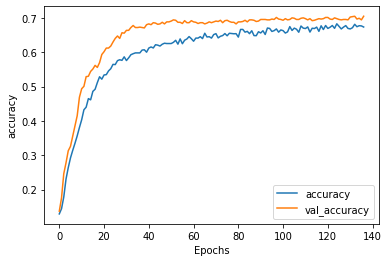

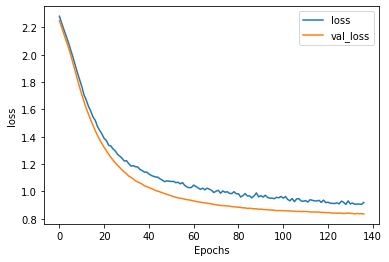

In [72]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [73]:
input_state = [[-1, 1, -1, -1, 0, 0, 1, -1, 1]]

inp = np.asarray(input_state).astype(np.float32)
inp = inp.reshape(((inp.shape[0], 1, inp.shape[1])))
prediction = model.predict(inp)
#print(prediction)

print(np.argmax(prediction))

5


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb+') as f:
  f.write(tflite_model)